# Принятие решений в бизнесе. Анализ результатов A/B теста

**Описание проекта**

Вместе с отделом маркетинга аналитик крупного интернет-магазина подготовили список гипотез для увеличения выручки.
Задача: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель исследования:**
Увеличение выручки интернет-магазина

**Ход исследования:**
* с помощью фреймворков ICE и RICE приоритизовать гипотезы
* загрузить и подготовить данные к анализу
* провести исследовательский анализ данных
* сделать выводы

**Описание данных**
_______
Данные для первой части
Файл /datasets/hypothesis.csv
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
____________

Данные для второй части
Файл /datasets/orders.csv
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

In [1]:
# импорт библиотек
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import math as mth

В файле **/datasets/hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [2]:
# чтение файла
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 0)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Применим фреймворк ICE и RICE для приоритизации гипотез, добавим столбцы
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


In [4]:
# Отсортируем по убыванию приоритета и посмотрим на результаты ICE
hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
# Отсортируем по убыванию приоритета и посмотрим на результаты RICE 
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
hypothesis_RICE

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id='hip'></a>

**Выводы:**

Применив фреймворк ICE, можно выделить следующую тройку лидеров гипотез
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

тройка лидеров с применением фреймворка RICE отличается:
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Списки лидеров отличаются и лидер ICE - гипотеза 8 - сильно устапает в фреймворке RICE. Аналогично в обратную сторону с гипотезой 2. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений. Это важный критерий оценки гипотез.
Две гипотезы - 7 и 0 встречаются в обоих списках-лидерах. Стоит обратить на них внимание, как наиболее приоритетные гипотезы.

## Часть 2.  Анализ A/B-теста

После проведения A/B теста, получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
_________

In [6]:
orders = pd.read_csv('/datasets/orders.csv') # чтение файла
orders.head() # обзор данных

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# Изучение общей информации. Проверка на наличие дубликатов. Таблица orders
print(orders.info())
print()
print()
print(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


0


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv') # чтение файла
visitors.head() # обзор данных

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# Проверим данные таблицы visitors на аномалии, выбросы, дубликаты
print(visitors.info())
print()
print()
print(visitors.duplicated().sum())
print()
print()
print(visitors.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


0


         visitors
count  62.000000 
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


**Выводы:**

В таблицах пропущенных значений нет. Дубликатов нет. Столбцы, где указано время необходимо переформатировать.

In [10]:
# Приведем столбцы с датами к формату дат
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
# проверим работу метода
print(visitors.info())
print()
print()
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


In [12]:
# проверим корректность предоставленных данных относительно времени исследования 
print(orders['date'].min())
print(visitors['date'].min())
print(orders['date'].max())
print(visitors['date'].max())

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-31 00:00:00


Мы располагаем данными с 1 августа 2019 года по 31 августа 2019.

Проверим корректность распределения на группы.

In [13]:
print('количество заказов в группе A:', len(orders[orders['group']=='A']))
print('количество заказов в группе В:', len(orders[orders['group']=='B']))
print('общее число заказо:', orders['transactionId'].nunique())

количество заказов в группе A: 557
количество заказов в группе В: 640
общее число заказо: 1197


In [14]:
print('количество посещений в группе А:', visitors[visitors['group']=='A']['visitors'].sum())
print('количество посещений в группе B:', visitors[visitors['group']=='B']['visitors'].sum())
print()
print('общее число посещений:', visitors['visitors'].sum())

количество посещений в группе А: 18736
количество посещений в группе B: 18916

общее число посещений: 37652


все в порядке

Проверим, достаточно ли этого числа посещений для корректого A/B теста.

In [15]:
initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
result_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.2%}'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.2%}'.format(result_conversion))
print('Относительное изменение конверсии после изменений: {:.2%}'.format(1-(initial_conversion/result_conversion)))

Начальная конверсия: 2.97%
Полученная после изменений конверсия: 3.38%
Относительное изменение конверсии после изменений: 12.13%


На сайте онлайн-калькулятора https://www.evanmiller.org/ab-testing/sample-size.html введем наши данные:
- Baseline conversion rate: 3%
- Minimum Detectable Effect: 12% (relative)
- Significance level α: 5%
- Statistical power 1−β: 80%

 **= Sample size: 35,855 per variation**

**Вывод:**

С помощью калькулятора я установила: рекомендованный размер выборки 35 тысяч посещений на одну группу.
В нашем датасете данных недостаточно: общее число посещений: 37652

Посчитаем необходимую продолжительнотсь A/B теста. Зададим наши параметры в онлайн-калькулятор

https://vwo.com/tools/ab-test-duration-calculator/

In [16]:
daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
print('среднее количество посещений в день в группе А:', round(daily_a['visitors'].mean()))
print('среднее количество посещений в день в группе В:', round(daily_b['visitors'].mean()))
print('среднее количество посещений в день:', round(visitors['visitors'].mean()))

среднее количество посещений в день в группе А: 604
среднее количество посещений в день в группе В: 610
среднее количество посещений в день: 607


- Estimated existing conversion rate (%) 3%
- Minimum improvement in conversion rate you want to detect (%) 12%
- Number of variations/combinations (including control) 2
- Average number of daily visitors 607
- Percent visitors included in test 100%
    - **Total number of days to run the test: 118 days**

**Вывод:**

Тест проходил 31 день, но для каждой группы считался отдельный день. 62 на две группы. Рекомендованное количество дней для такого теста 118

In [17]:
group_a = orders[orders['group']=='A']
group_b = orders[orders['group']=='B']

In [18]:
print('количество уникальных пользователей в группе A', group_a['visitorId'].nunique())
print('количество уникальных пользователей в группе В', len(group_b['visitorId'].unique()))
print('количество уникальных пользователей всего', orders['visitorId'].nunique())

количество уникальных пользователей в группе A 503
количество уникальных пользователей в группе В 586
количество уникальных пользователей всего 1031


сумма уникальных пользователей в двух группах не сходится с общим числом уникальных пользователей. Возможно один и тот же пользователь попал в обе группы тестирования. Проверим это гипотезу

In [19]:
# создадим переменную, в которой будут хранится данные о пользователях, попавших в обе группы
ab_visitors = orders.loc[orders["visitorId"].isin(group_a['visitorId'])& orders['visitorId'].isin(group_b['visitorId'])]
ab_visitors['visitorId'].nunique() # выведем число этих пользователей

58

Действительно, 58 человек попали в обе группы

Принимаю решение не удалять этих пользователей так как в данном исследовании я провожу веб-аналитику, а не событийную. Мне важно учесть именно сессии, а не идентифицировать каждого пользователя отдельно.

**Вывод:**

На этапе предобработки данных я  
- установила, что в данных нет дубликатов и пропусков
- привела столбцы с датой к нужному формату дат
- обнаружила пользователей, которые попали в обе группы. Приняла решение их не удалять
______________
    
Если расчеты верны, то время и размер выборки не соответствуют требованиям. Чтобы исключить проблему подглядывания необходимо остановить анализ.
_________________________
    
                                                но мы продолжаем :)    

Приступим к анализу А/B теста

### График кумулятивной выручки по группам

Подготовим данные

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах

In [21]:
# Вычислим максимальную дату.
# чтобы столбец 'group' не пропал из итогового вывода, расчитаем для него максимум
# Найдём число уникальных ID заказов и пользователей 
# Подсчитаем сумму средних чеков
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date','group'])

получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [22]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

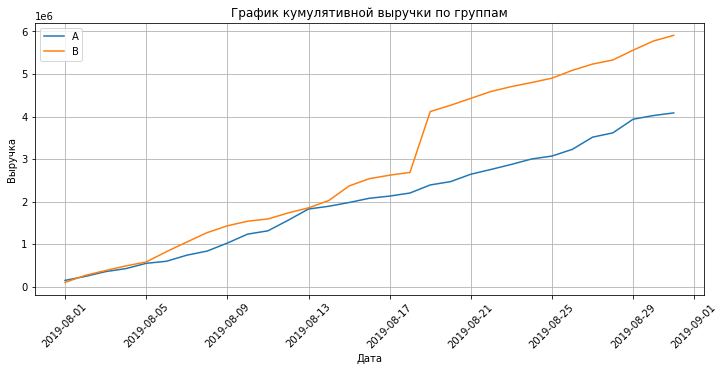

In [25]:
plt.figure(figsize=(12,5)) # задаем размер графика

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show();

**Вывод:**

- Выручка увеличивается в течение всего теста
- Группа В показывает бОльшую выручку на протяжении всего изучаемого периода
- График выручки группы В резко растет 18 августа. Вероятно в данных встречаются аномально большие заказы: это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

### График кумулятивного среднего чека по группам

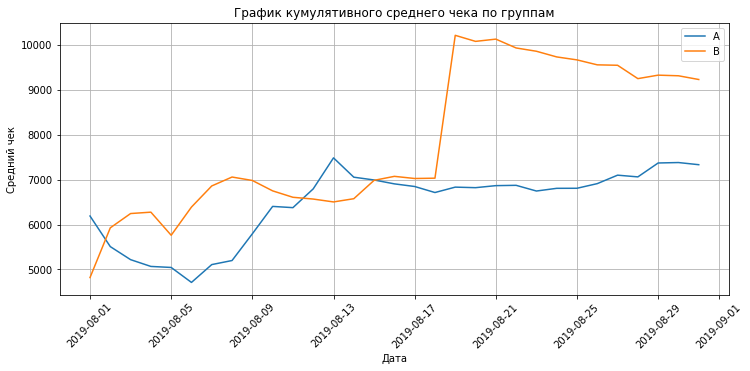

In [26]:
plt.figure(figsize=(12,5)) # задаем размер графика

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show();

<a id='proof'></a>

**Вывод:**

- Группа В опять показывает стабильно высокие результаты. Скачок 18-19 августа сохраняется
- Группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне
- Для группы A ближе к концу теста средний чек становится равномерным

### График относительного изменения кумулятивного среднего чека группы B к группе A.

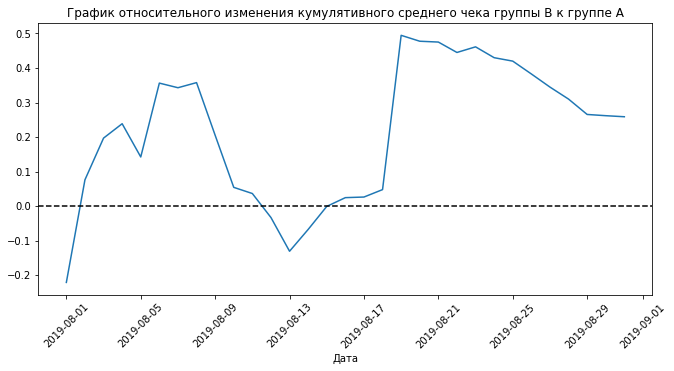

In [27]:
plt.figure(figsize=(11,5)) # задаем размер графика

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата');

**Выводы:**

Определенной тенденции относительного изменения кумулятивного среднего чека группы B к группе A - нет. График колеблется, данные сырые. Необходимо проверить данные на наличие аномальных пользователей.

### График кумулятивной конверсии по группам.

<a id='intro'></a>

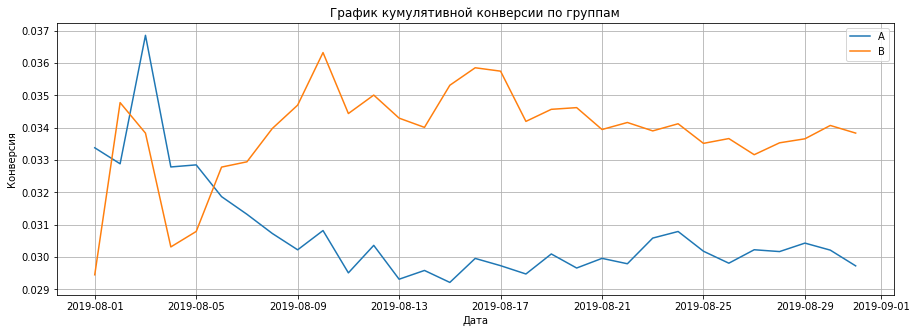

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5)) # задаем размер графика

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.grid()
plt.show();

**Вывод:**

- До 10 августа конверсия колеблется, но после конверсия обеих групп стабилизировалась
- Конверсия группы В выше конверсии группы А
- Конверсия группы А сильно просела после первых дней теста, в отличае от конверсии группы В, которая выросла и зафиксировалась

### График относительного изменения кумулятивной конверсии группы B к группе A

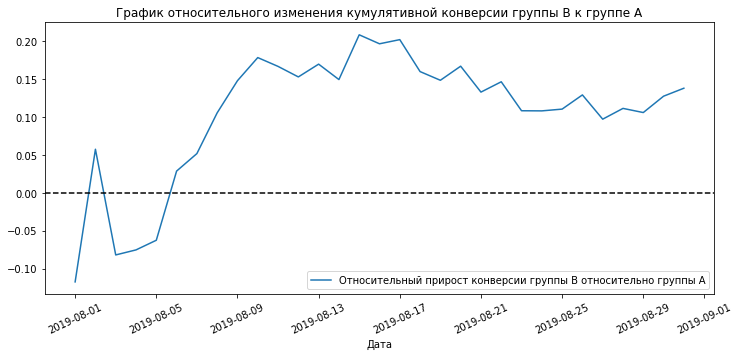

In [29]:
plt.figure(figsize=(12,5)) # задаем размер графика

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation = 25)
plt.legend()
plt.show();

**Вывод:**

- В начале теста группа B проигрывала группе A, но после 5 августа стала расти и с 6 августа вырвалась вперёд
- После 10 августа конверсия установилась - конверсия группы В выигрывает по отношению к группе А

### Точечный график количества заказов по пользователям

Создадим переменные с пользователями и количеством заказов

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


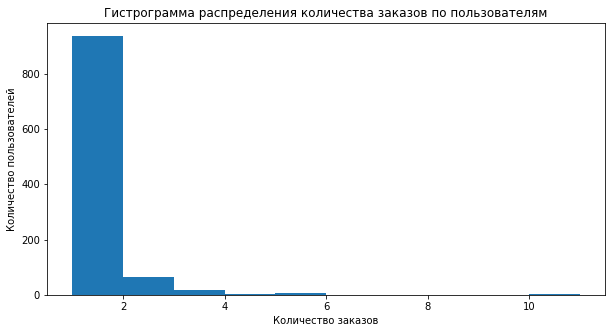

In [31]:
plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show();

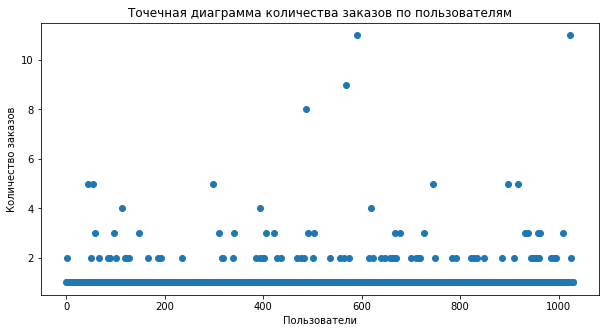

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show();

**Вывод:**

- Большинство пользователей имеют небольшое количество заказов - до двух
- в данных есть пользователи, имеющие 4, 5 и даже 10 заказов

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

Найдем границу для определения аномальных пользователей по количеству заказов на пользователя с помощью метода percentile() библиотеки Numpy

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:**

- 95% пользователей имеют не более 2 заказов
- 99% пользователей имеют не более 4 заказов
___________
Отсеим не более 5% аномальных значения: **Установим границу в 2 заказа**

### Точечный график стоимостей заказов

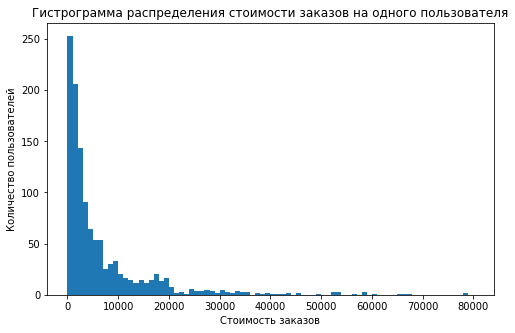

In [34]:
plt.figure(figsize=(8,5))
plt.hist(orders['revenue'], range=(0,80000), bins = 80)
plt.title('Гистрограмма распределения стоимости заказов на одного пользователя')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show();

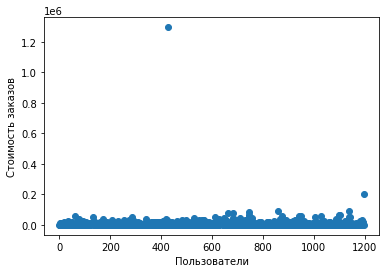

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue']);

Посмотрим на график более детально, исключив выбросы


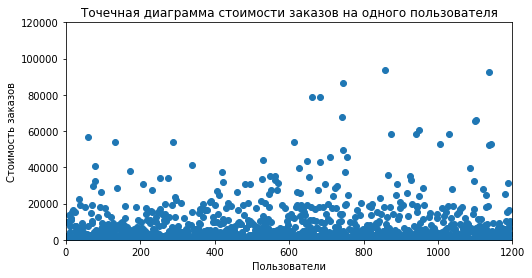

In [36]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(8,4))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title('Точечная диаграмма стоимости заказов на одного пользователя')
plt.axis([0, 1200, 0, 120000])
plt.show();

**Вывод:**

- Судя по графикам большая часть пользователей делает заказы на сумму до 10 тысяч рублей
- небольшая часть от 10 до 20 тысяч рублей
- свыше 20 тысяч рыблей заказы уже редки
- тем не менее встречаются аномально дорогостоящие заказы по 80 и 100 тысяч рублей. Даже один заказ более миллиона рублей

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [37]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**

- 95% покупателей тратят до 28 тысяч рублей
- 99% покупателей тратят до 58 тысяч рублей

___________
Отсеим не более 5% аномальных значения: **Установим границу в 28 тысяч рублей**

### Статистическая значимость различий в конверсии между группами по «сырым» данным.

Подготовим данные

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Названия столбцов данных:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Сформулируем гипотезы:

**Нулевая:** различий в конверсии между группами нет.

**Альтернативная:** различия в конверсии между группами есть.

In [40]:
alpha = 0.05  # критический уровень статистической значимости
print('относительное различие конверсии между группами:', '{:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(round(results.pvalue, 4)))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. По "сырым" данным в конверсии групп A и B разница статистически значима')
else:
    print('По "сырым" данным различий в конверсии групп A и B нет')

относительное различие конверсии между группами: 13.81%
P-value: 0.0168
Отвергаем нулевую гипотезу. По "сырым" данным в конверсии групп A и B разница статистически значима


- По "сырым" данным в конверсии групп A и B разница статистически **значима**
- Относительный выигрыш группы B равен 13% 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

**Нулевая:** различий в среднем чеке заказа между группами по «сырым» данным нет.

**Альтернативная:** различия в среднем чеке заказа между группами по «сырым» данным есть.

In [41]:
alpha = 0.05  # критический уровень статистической значимости
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.2%}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(round(results.pvalue, 5)))
if results.pvalue < alpha:
    print('По сырым данным различий в среднем чеке в группах статистически значима')
else:
    print('По сырым данным различий в среднем чеке в группах нет')

Относительное изменение среднего чека в группе B по отношению группы A: 25.87%
P-value: 0.72929
По сырым данным различий в среднем чеке в группах нет


<div class="alert alert-info">

**Вывод:**

- Средний чек группы B выше на 25% 
- несмотря на это наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно, как показал тест Манна-Уитни.

    Это может быть связано с тем, что группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне [proof](#proof)

    
</div>

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Почистим данные. Сделаем срезы пользователей без аномальных значений

Объявим переменные order_95 и revenue_95, в которых запишем значения для усечения датасета.


In [42]:
order_95 = np.percentile(ordersByUsers['orders'], 95)
revenue_95 = np.percentile(orders['revenue'], 95)

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_95]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_95]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_95]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Всего пользователей с аномальными заказами:', abnormalUsers.shape[0])

Всего пользователей с аномальными заказами: 74


Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Сформулируем гипотезы:

**Нулевая:** различий в конверсии между группами по очищенным данным нет.

**Альтернативная:** различия в конверсии между группами по очищенным данным есть.

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [45]:
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп разница статистически значима')
else:
    print('По очищенным данным различий в конверсии групп A и B нет')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 17.270%
P-value: 0.013042592743036745
По очищенным данным в конверсии групп разница статистически значима


**Вывод:**
- после очистки данных относительный прирост конверсии группы В по отношению к группе А составил 17% - больше, чем по сырым данным
- общий вывод по результатам теста не изменился - разница статистически **значима**

### Статистическуая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [46]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3%}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным разница в среднем чеке между группами статистически значима')
else:
    print('По очищенным данным различий в среднем чеке между группами нет')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -1.962%
P-value: 0.738481751314565
По очищенным данным различий в среднем чеке между группами нет


**Вывод:**

- после очистки данных средний чек в группе B по отношению к группе A  меньше на 2%
- общий вывод по результатам теста не изменился - по очищенным данным в среднем чеке групп A и B разница статистически **не значима**

### Решение по результатам теста

- Статистического значимого различия по среднему чеку между группами по сырым данным и по очищенным данным - нет.

поэтому в принятии решения по результатам теста я не буду ориентироваться на средний чек

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий

[График различия](#intro) конверсии между группами указывает, что результаты группы B лучше группы A: конверсия группы В зафиксировались выше конверсии группы А - это важный критерий в принятии решения.

**Решение: осстановить тест и признать его успешным. Группа B показала лучшие метрики**

## Общий вывод

В данном исследовании было необходимо принять решение для бизнеса на основании проведенного A/B теста.

Первой задачей было [приоритизация гипотез.](#hip) Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, я из 9 гипотез выбрала две наиболее подходящих.  

Далее мы запустили A/B тест.

Результаты тестирования были представлены в двух таблицах: таблица с заказами `/datasets/orders.csv` и таблица с посещениями `/datasets/visitors.csv`

 - изучила общую информацию
 - проверила данные на пропуски, выбросы и дубликаты
 - переформатировала данные с датой
 
 Чтобы провести анлиз тестирования я собрала агрегированные кумулятивные данные о заказах по дням и сохранила их в датафрейм `cumulativeData`
  - График выручки, среднего чека и график относительного изменения кумулятивного среднего чека позволили мне сделать предположене, что в данных есть аномально большие заказы.
  -  с помощью метода `percentile()` нашла границу для определения аномальных пользователей и установила ее на уровне 95%. То есть отфильровала данные, убрав из них 5% пользователей с аномальными заказами
  
Важной частью исследования был **подсчет статистической значимости различий ключевых метрик.**
Именно на этот показатель я опиралась в принятии решений о завершении теста.

Я установила, что относительные различия в конверсии между группами статистически значимы.

График кумулятивной конверсии по группам и график относительного изменения кумулятивной конверсии группы B к группе A помог определить, что
- **группа B имеет лучшую конверсию в покупателей, относительно группы A.**

**Тест завершен и признан успешным**.